In [ ]:
import os
# Set working directory manually on Gadi to be able to load csv files
user = os.getenv('USER')
os.chdir('/scratch/cd82/'+user+'/notebooks/')

## Checking Python packages

In [1]:
# !which python
# !where python

In [2]:
# Package installation if not already installed
# !pip install numpy
# !pip install scikit-learn

In [3]:
# import importlib
# import os

# packages = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'sklearn', 'xgboost', 'shap']

# for pkg in packages:
#     try:
#         module = importlib.import_module(pkg)
#         path = os.path.dirname(module.__file__)
#         print(f"{pkg}: {path}")
#     except ImportError:
#         print(f"{pkg}: Not installed")

# Decision Tree Basics

Decision Trees are supervised learning models used for both classification and regression tasks. They work by recursively splitting the dataset based on feature values to reduce impurity.

## How It Works
- For **classification**, trees use metrics like **Gini impurity** or **Entropy** to decide the best split.
- For **regression**, they typically minimize **Mean Squared Error (MSE)**.

The tree starts at a root and splits the data into branches based on feature thresholds, creating a path to a decision leaf.

> ## 🔍 How Splitting Works in Decision Trees

### 🧪 Classification: Gini Impurity and Entropy

To decide the best feature and threshold to split on, decision trees evaluate **impurity** at each possible split. Lower impurity means a better split.

#### ✅ Gini Impurity

Gini measures how often a randomly chosen element would be incorrectly labeled if it was randomly labeled according to the distribution in the node:

$$
\text{Gini} = 1 - \sum_{i=1}^{C} p_i^2
$$

Where:
- $ C $ is the number of classes  
- $ p_i $ is the proportion of class $ i $

#### ✅ Entropy (Information Gain)

Entropy measures the disorder or uncertainty of the classes:

$$
\text{Entropy} = - \sum_{i=1}^{C} p_i \log_2(p_i)
$$

A split is chosen to **minimize the weighted impurity** (Gini or Entropy) of the resulting child nodes.

---

### 📈 Regression: Mean Squared Error (MSE)

In regression trees, the quality of a split is measured using **Mean Squared Error**, which calculates how far predictions are from actual values.

#### ✅ MSE Formula

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2
$$

Where:
- $ y_i $ are the true values  
- $ \bar{y} $ is the mean value of the current region  
- $ n $ is the number of samples

The best split minimizes the **total MSE** across the child nodes.

---

### 🎯 Final Prediction

- **Classification Tree**: predicts the **majority class** in a leaf.
- **Regression Tree**: predicts the **mean target value** of samples in a leaf.


## Key Hyperparameters
- `max_depth`: Maximum number of splits down any path.
- `min_samples_split`: Minimum samples needed to split a node.
- `min_samples_leaf`: Minimum samples in a leaf node.
- `criterion`: Splitting metric (`gini`, `entropy`, `squared_error`).

### Importing packages

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, fetch_openml
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

# Classification on Heart Disease dataset 

In [ ]:
# Load dataset 
df = pd.read_csv("heart.csv")

# Display dataframe
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# show numerical columns
display(df.describe())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


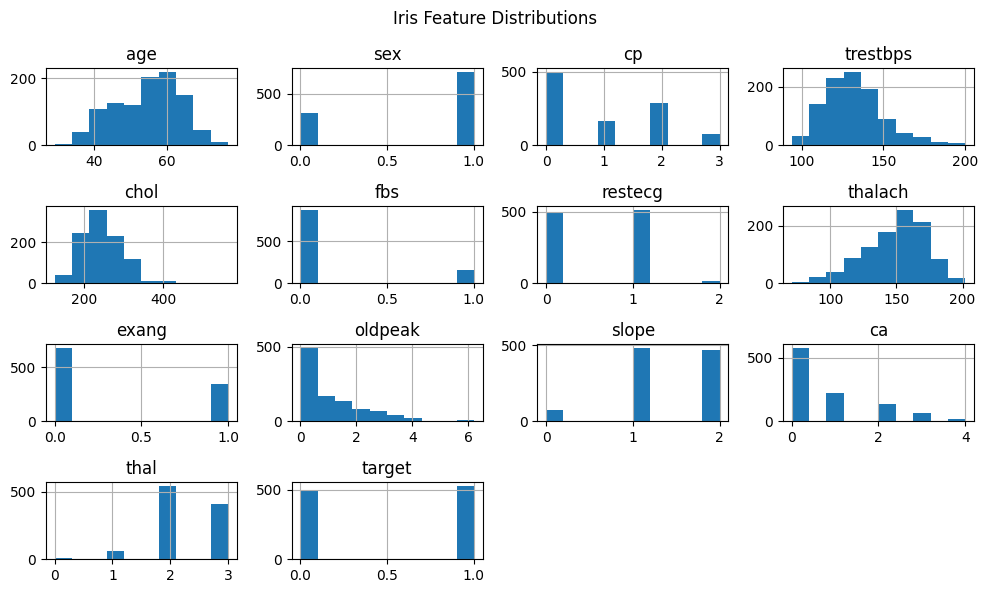

In [7]:
df.hist(figsize=(10,6))
plt.suptitle('Iris Feature Distributions')
plt.tight_layout()
plt.show()


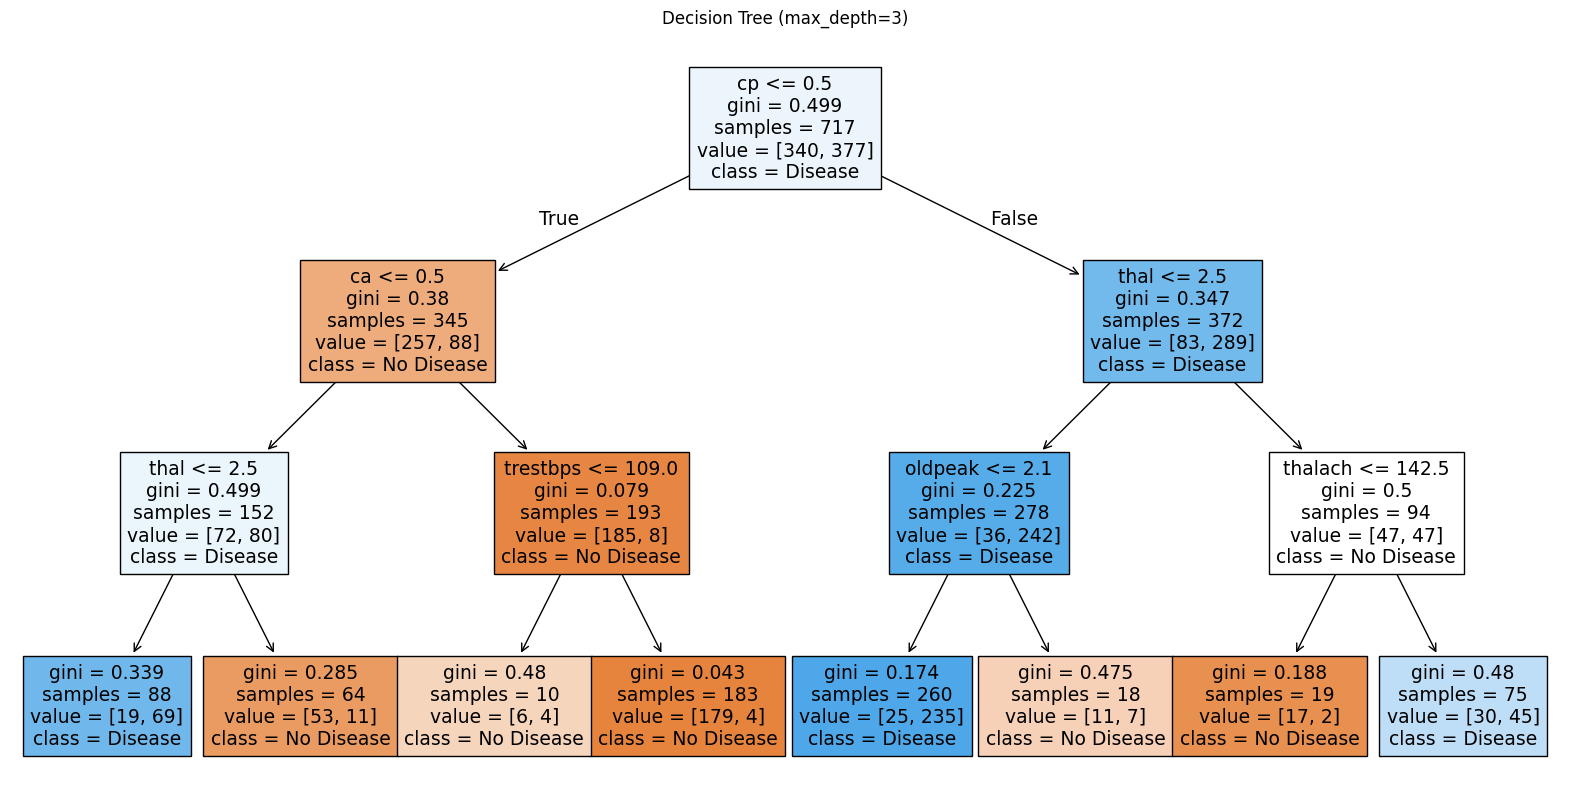

In [8]:
# Load dataset 
df = pd.read_csv("heart.csv")

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree (max_depth=3)")
plt.show()

Accuracy: 0.81


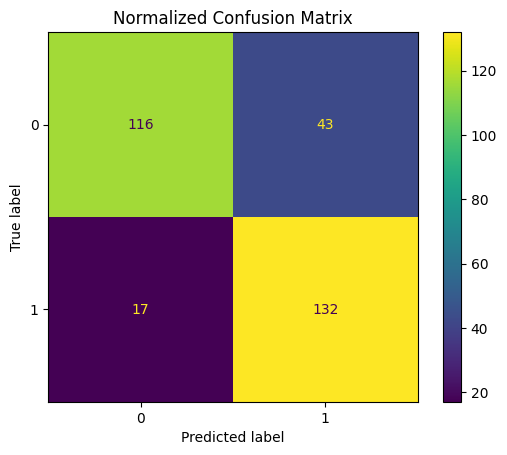

In [9]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display
print(f"Accuracy: {accuracy:.2f}")

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Normalized Confusion Matrix")
plt.show()


# Regression with California Housing

In [10]:
# Load regression dataset (California housing)
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [11]:
# California Housing dataset
display(df.head())


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


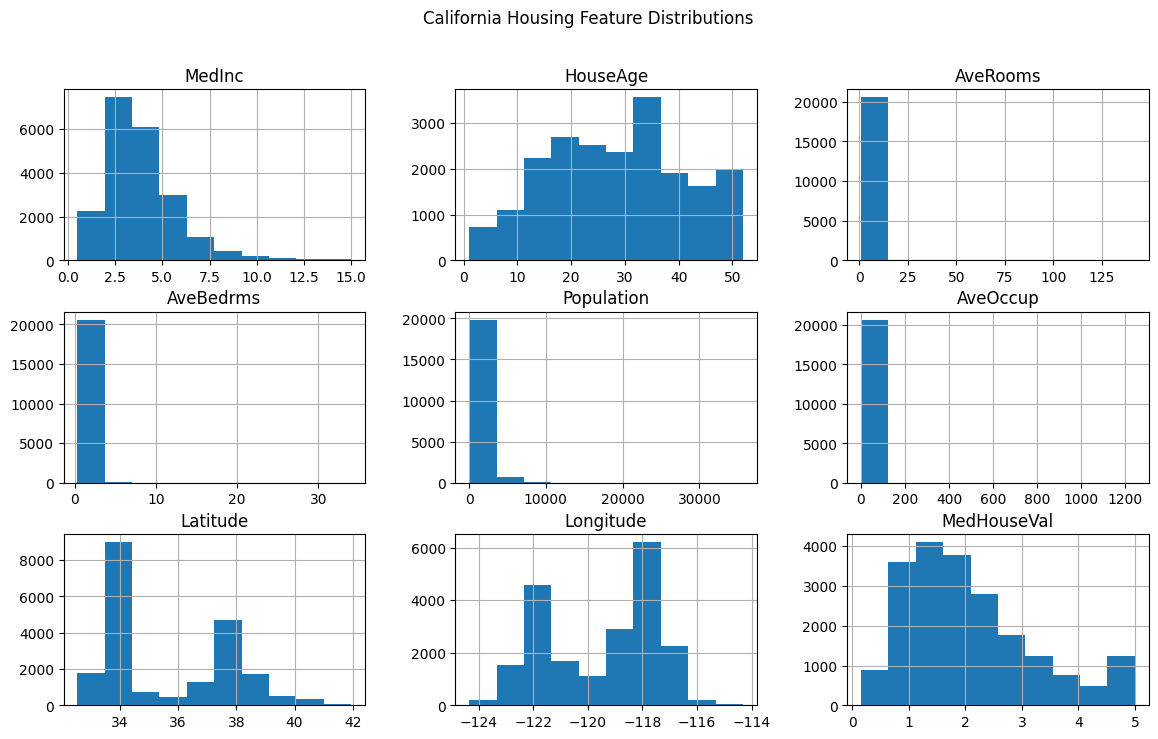

In [12]:
df.hist(figsize=(14,8))
plt.suptitle('California Housing Feature Distributions')
plt.show()


In [13]:
# Train a Decision Tree Regressor
X = housing.data
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = DecisionTreeRegressor(max_depth=3, random_state=42)
reg.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


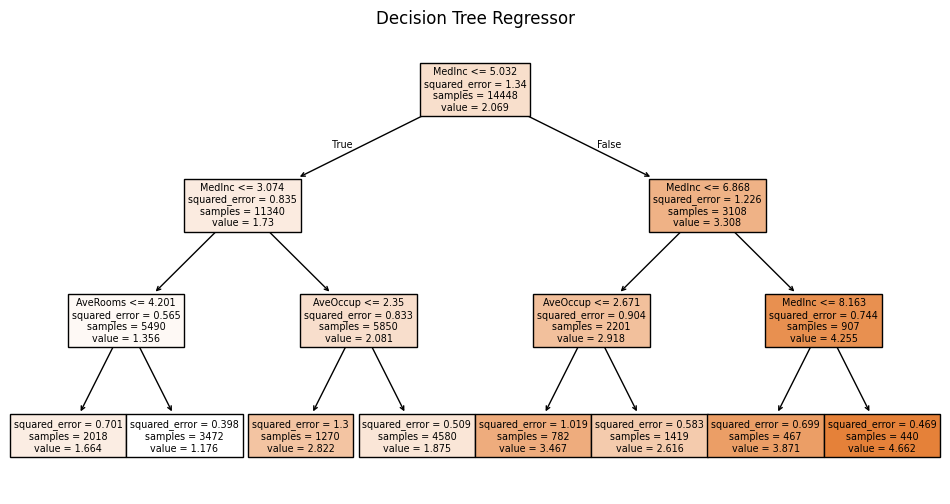

In [14]:
plt.figure(figsize=(12, 6))
plot_tree(reg, feature_names=housing.feature_names, filled=True)
plt.title('Decision Tree Regressor')
plt.show()

### What is R² (Coefficient of Determination)?

The R² score measures how well the predictions of a regression model approximate the actual data. It is defined as:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

Where:
- $ y_i $ are the actual values,
- $ \hat{y}_i $ are the predicted values,
- $ \bar{y} $ is the mean of the actual values.

**Interpretation:**
- $ R^2 = 1 $: perfect prediction
- $ R^2 = 0 $: model predicts no better than the mean
- $ R^2 < 0 $: model performs worse than predicting the mean


In [15]:
from sklearn.metrics import r2_score

# Predict on test set
y_pred = reg.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Display
print(f"R² Score: {r2:.2f}")


R² Score: 0.52
